# Causas defunciones (serie temporal)

Se presenta una serie de datos "defunciones.xlsx" que recoge una serie temporal desde 1980 a 2018 donde cada línea representa un mes y muestra el número de defunciones de `todas las causas`, `tumores` y `causas externas`. Se pretende ajustar el mejor modelo de series temporales.

In [274]:
import pickle

import scipy.stats
import numpy as np
import pandas as pd
import matplotlib as mpl
from sklearn import svm
from sklearn import ensemble
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
!pip install statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

%matplotlib inline

In [243]:
# -*- coding: utf-8 -*-


In [244]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

defunciones = pd.read_csv('C:\\Users\\monic\\OneDrive\\DATASCIENCE - UCM\\07_MINERIADATOS_20230109\\DATOS\\defunciones.csv')
defunciones

,Fecha,Todas las causas,Tumores,Causas externas
0,1980M01,"28,681","4,883","1,277"
1,1980M02,"23,906","4,493","1,122"
2,1980M03,"25,275","4,957","1,244"
3,1980M04,"22,500","4,523","1,214"
4,1980M05,"22,781","4,893","1,228"
5,1980M06,"21,495","4,751","1,171"
6,1980M07,"22,117","4,958","1,499"
7,1980M08,"22,735","4,968","1,567"
8,1980M09,"21,020","4,796","1,329"
9,1980M10,"22,852","5,057","1,302"


In [245]:
fechas = pd.date_range('1980-01','2019-01', 
               freq='M').strftime("%Y-%m").tolist()
fechas = pd.Series(fechas)

In [246]:
defunciones_R = pd.concat([fechas,defunciones], axis=1)
defunciones_R.columns = ['Date','Fecha','Todas las causas','Tumores','Causas externas']
defunciones_R.head()

,Date,Fecha,Todas las causas,Tumores,Causas externas
0,1980-01,1980M01,"28,681","4,883","1,277"
1,1980-02,1980M02,"23,906","4,493","1,122"
2,1980-03,1980M03,"25,275","4,957","1,244"
3,1980-04,1980M04,"22,500","4,523","1,214"
4,1980-05,1980M05,"22,781","4,893","1,228"


In [247]:
# convertimos en serie temporal e indice
defunciones_R.set_index(['Date'],inplace=True)
defunciones_R.index=pd.to_datetime(defunciones_R.index)

In [248]:
# nos quedamos solo con 2 columnas, fecha y variable.
defunciones_R = defunciones_R.drop('Fecha', axis=1)
defunciones_R = defunciones_R.drop('Causas externas', axis=1)
defunciones_R = defunciones_R.drop('Todas las causas', axis=1)
defunciones_R

,Tumores
Date,
1980-01-01,"4,883"
1980-02-01,"4,493"
1980-03-01,"4,957"
1980-04-01,"4,523"
1980-05-01,"4,893"
1980-06-01,"4,751"
1980-07-01,"4,958"
1980-08-01,"4,968"
1980-09-01,"4,796"


In [249]:
#cambiamos el tipo de dato objecto a numérico.
defunciones_R['Tumores'] = defunciones_R['Tumores'].apply(lambda x: x.replace(',','.'))
defunciones_R['Tumores'] = defunciones_R['Tumores'].astype('float64')
defunciones_R.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 468 entries, 1980-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tumores  468 non-null    float64
dtypes: float64(1)
memory usage: 7.3 KB


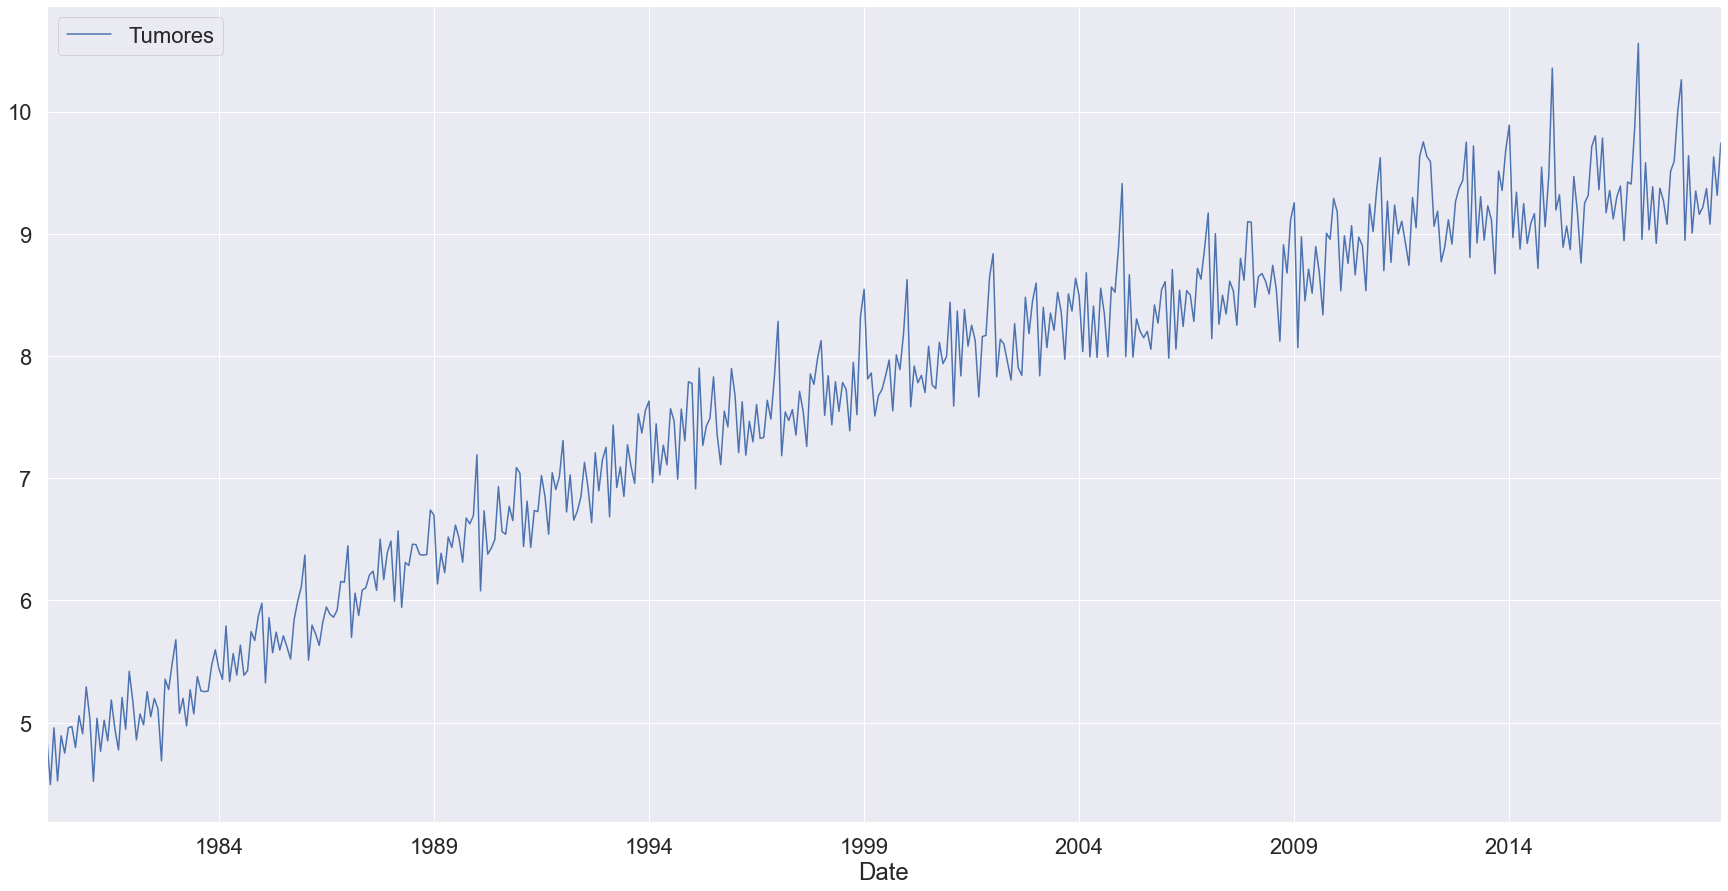

In [250]:
plt.rcParams["figure.figsize"] = (30,15)
defunciones_R.plot()
plt.show()

Es probable que esta serie tenga un componente estacional (como tiene el DF tiene en cuenta muchos años, el gráfico no nos permite ver las fechas en el eje x a simple vista) ya que se observan máximos y mínimos muy pronunciados. Además, estas fluctuaciones cada vez son mayores, por lo tanto se trata de una serie NO estacionaria con tendencia creciente (la media y variabilidad cambian a lo largo del tiempo). Para poder trabajar con ella debemos convertirla en estacionaria.

Para corroborar si efectivamente es estacionaria o no necesitamos hacer el test de Dickey-Fuller. Importamos el paquete para que se pueda hacer en cualquier momento. El contraste planteado es el siguiente: 

H0: La serie NO es estacionaria 

H1: La serie es estacionaria.

In [251]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', regression ='ct')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [252]:
test_stationarity(defunciones_R)

Results of Dickey-Fuller Test:
Test Statistic                  -0.373400
p-value                          0.987651
#Lags Used                      11.000000
Number of Observations Used    456.000000
Critical Value (1%)             -3.978761
Critical Value (5%)             -3.420162
Critical Value (10%)            -3.132739
dtype: float64


Se obtiene, como estaba previsto, un p-valor muy elevado (> 0,05) por tanto no podemos rechazar H0 de que la hipotesis no es estacionaria. Vamos a realizar la descomposición. Probaremos a hacer la adictiva y multiplicativa.

###### Descomposición adictiva

La descomposición estacional aditiva es un enfoque que descompone una serie temporal en tres componentes principales: tendencia, estacionalidad y residuos. La formulación aditiva implica que la serie temporal se representa como la suma de estas tres componentes. En contraste, la descomposición estacional multiplicativa implica que la serie temporal se representa como el producto de las tres componentes.

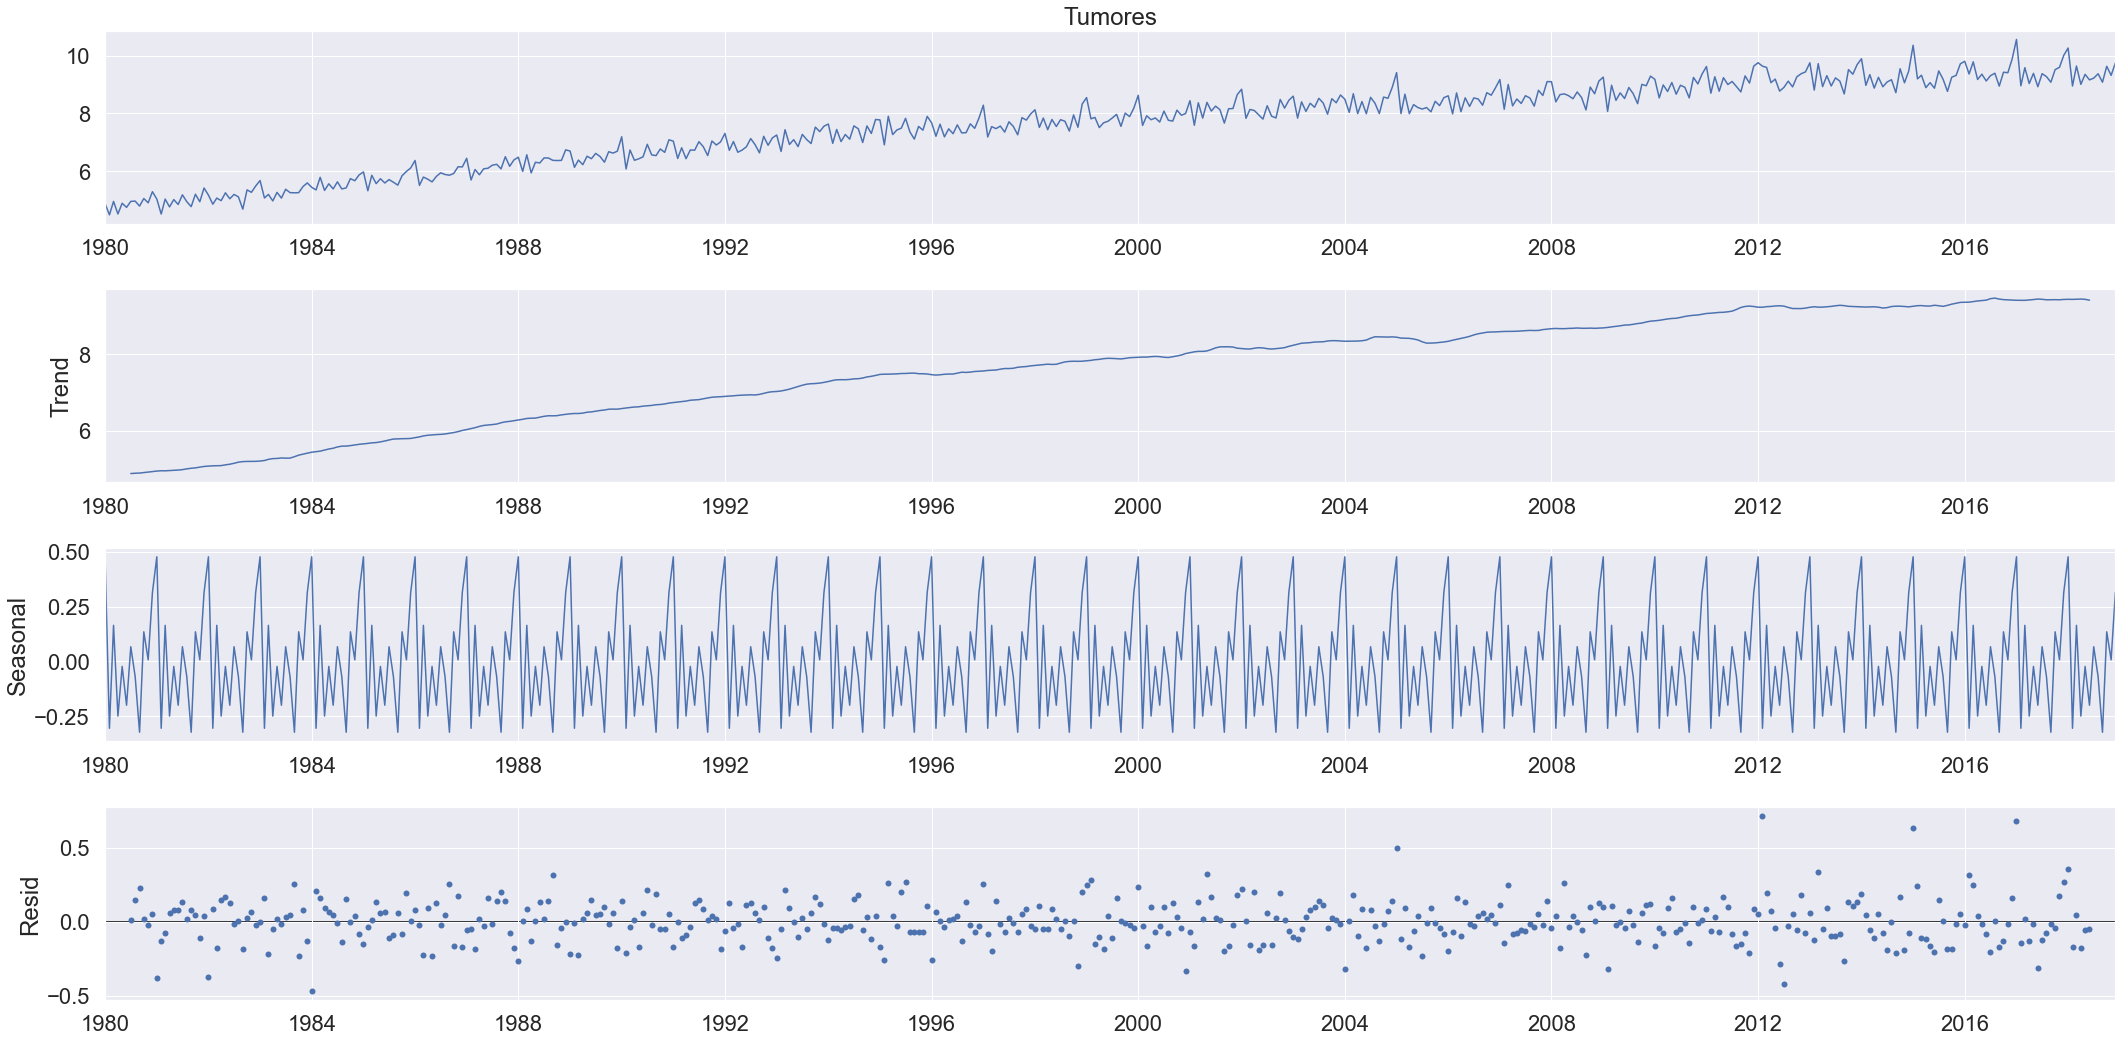

In [253]:
from statsmodels.tsa.seasonal import seasonal_decompose

Defunciones_desc_Ad = seasonal_decompose(defunciones_R['Tumores'], model='additive',period=12)
Defunciones_desc_Ad.plot()
plt.show()

Se puede observar como los residuos están centrados en 0 pero se mueven bastante. Este filtro no ha captado la esencia de la serie pero vamos a comprobar si es estacionaria.

In [254]:
#Aplicamos test a los residuos. Extraemos de la descomposición aditiva los residuos y los valores nulos
test_stationarity(Defunciones_desc_Ad.resid.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -8.913262e+00
p-value                        5.704945e-13
#Lags Used                     1.700000e+01
Number of Observations Used    4.380000e+02
Critical Value (1%)           -3.979589e+00
Critical Value (5%)           -3.420561e+00
Critical Value (10%)          -3.132974e+00
dtype: float64


El p-valor pequeño: el test de DF me dice que podemos rechazar H0 de que la serie no es estacionaria. La serie de residuos una vez extraída la tendencia de estacionalidad, podría llegar a ser estacional.

###### Descomposición multiplicativa

La descomposición multiplicativa es otro enfoque utilizado en el análisis de series temporales, similar a la descomposición aditiva. En este caso, la serie temporal se descompone en tres componentes principales (tendencia, estacionalidad y residuos), pero la representación se realiza mediante la multiplicación de estas componentes en lugar de su suma.

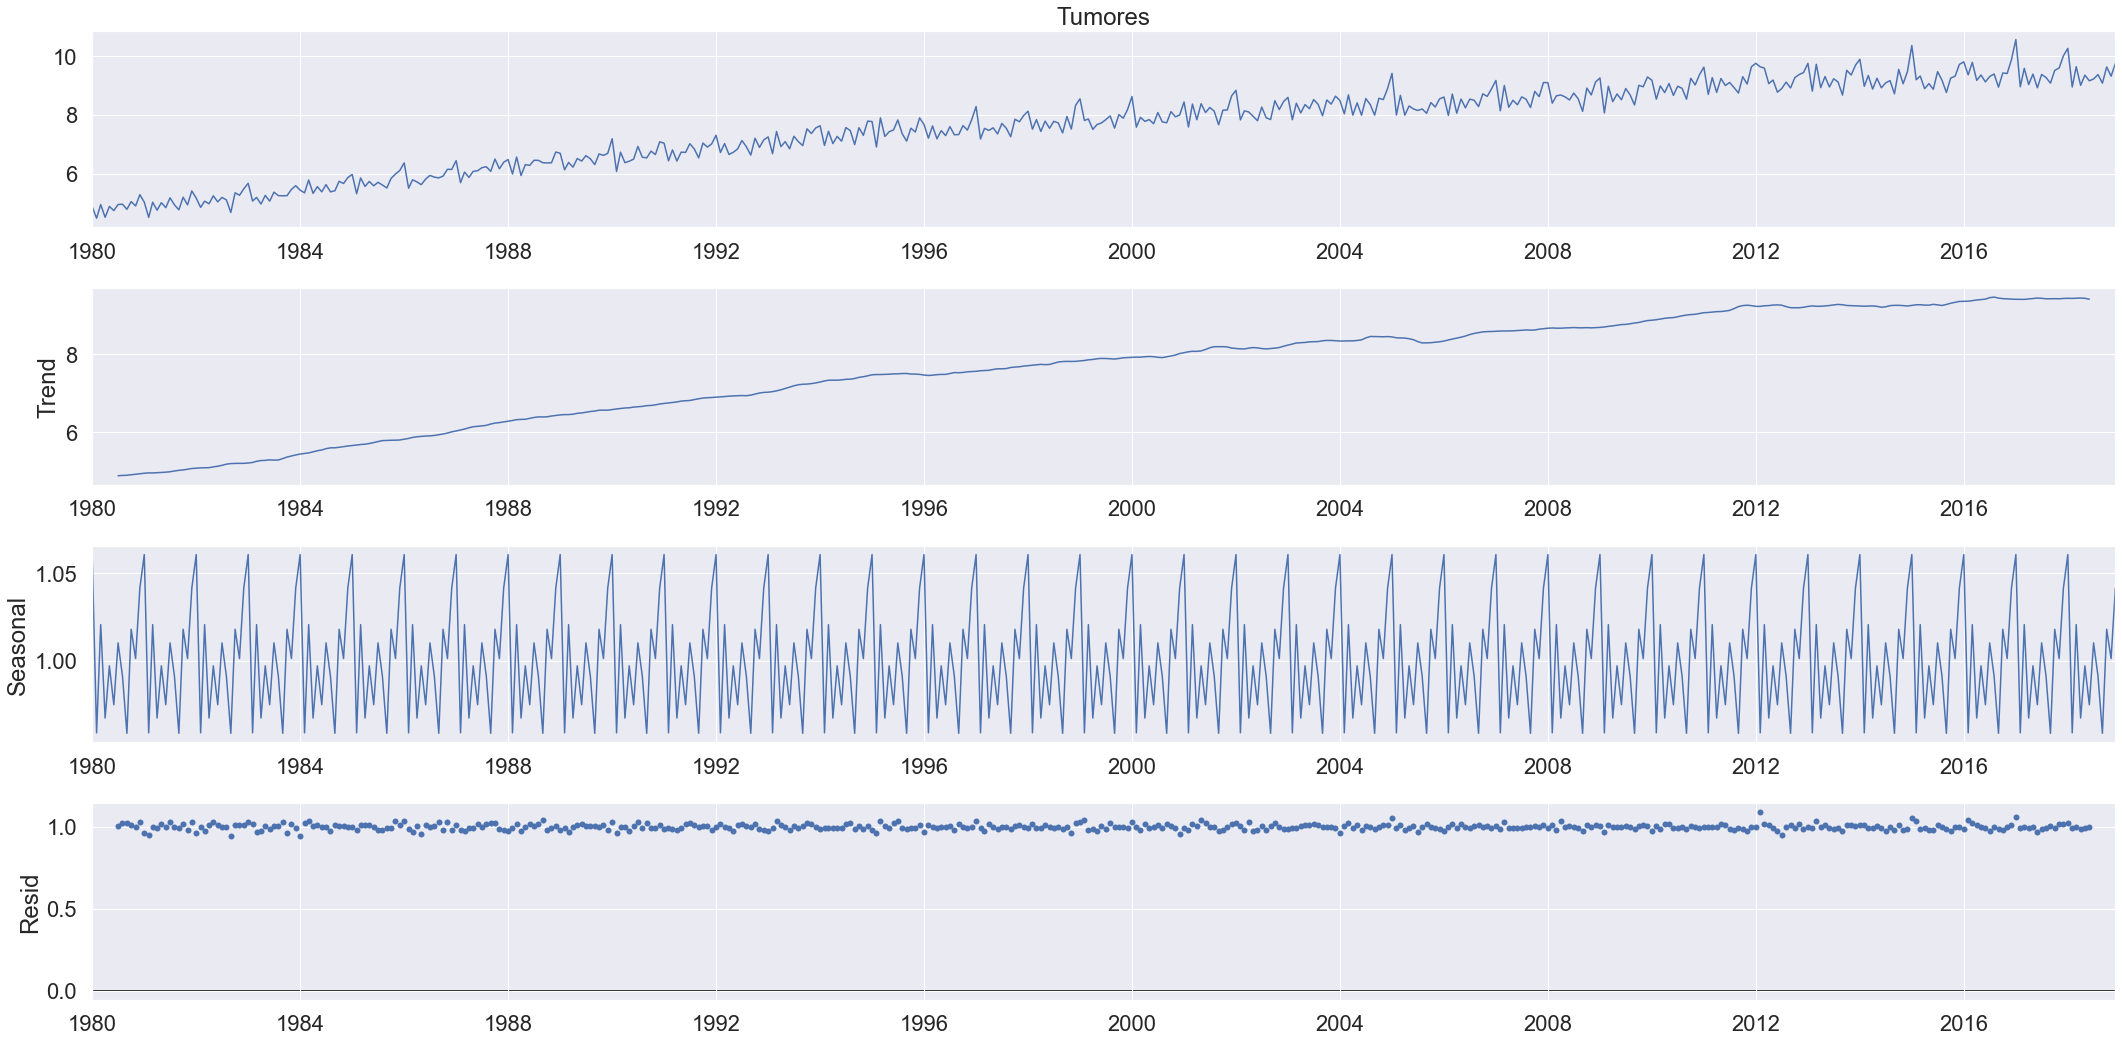

In [255]:
Defunciones_desc_Mul = seasonal_decompose(defunciones_R['Tumores'], model='multiplicative',period=12)
Defunciones_desc_Mul.plot()
plt.show()

Los residuos no están centrados en 0 sino en 1 proque estamos multiplicando el valor de tendencia. Además, se observa que funcionan mejor en el centro que en los extremos pero hay menos variabilidad que en el caso anterior.

Evaluamos estacionariedad de los residuos de la descomposición Multiplicativa. 

In [256]:
test_stationarity(Defunciones_desc_Mul.resid.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -9.081083e+00
p-value                        2.381654e-13
#Lags Used                     1.700000e+01
Number of Observations Used    4.380000e+02
Critical Value (1%)           -3.979589e+00
Critical Value (5%)           -3.420561e+00
Critical Value (10%)          -3.132974e+00
dtype: float64


Se observa un P-valor menor en la descomposición multiplicativa (presenta heterocedasticidad por eso es mejor este tipo de descomposición). Esta serie de residuos, por tanto, es más estacionaria que la anterior.

In [257]:
def seasonal_plot(df, season='year', index='month', column=None):

    if column == None:
        column = df.columns[0]
        
    piv_index = getattr(df.index, index)
    piv_season = getattr(df.index, season)
    
    piv = pd.pivot_table(df, index=piv_index, columns=piv_season, values=[column])
    piv.plot(figsize=(30,15))

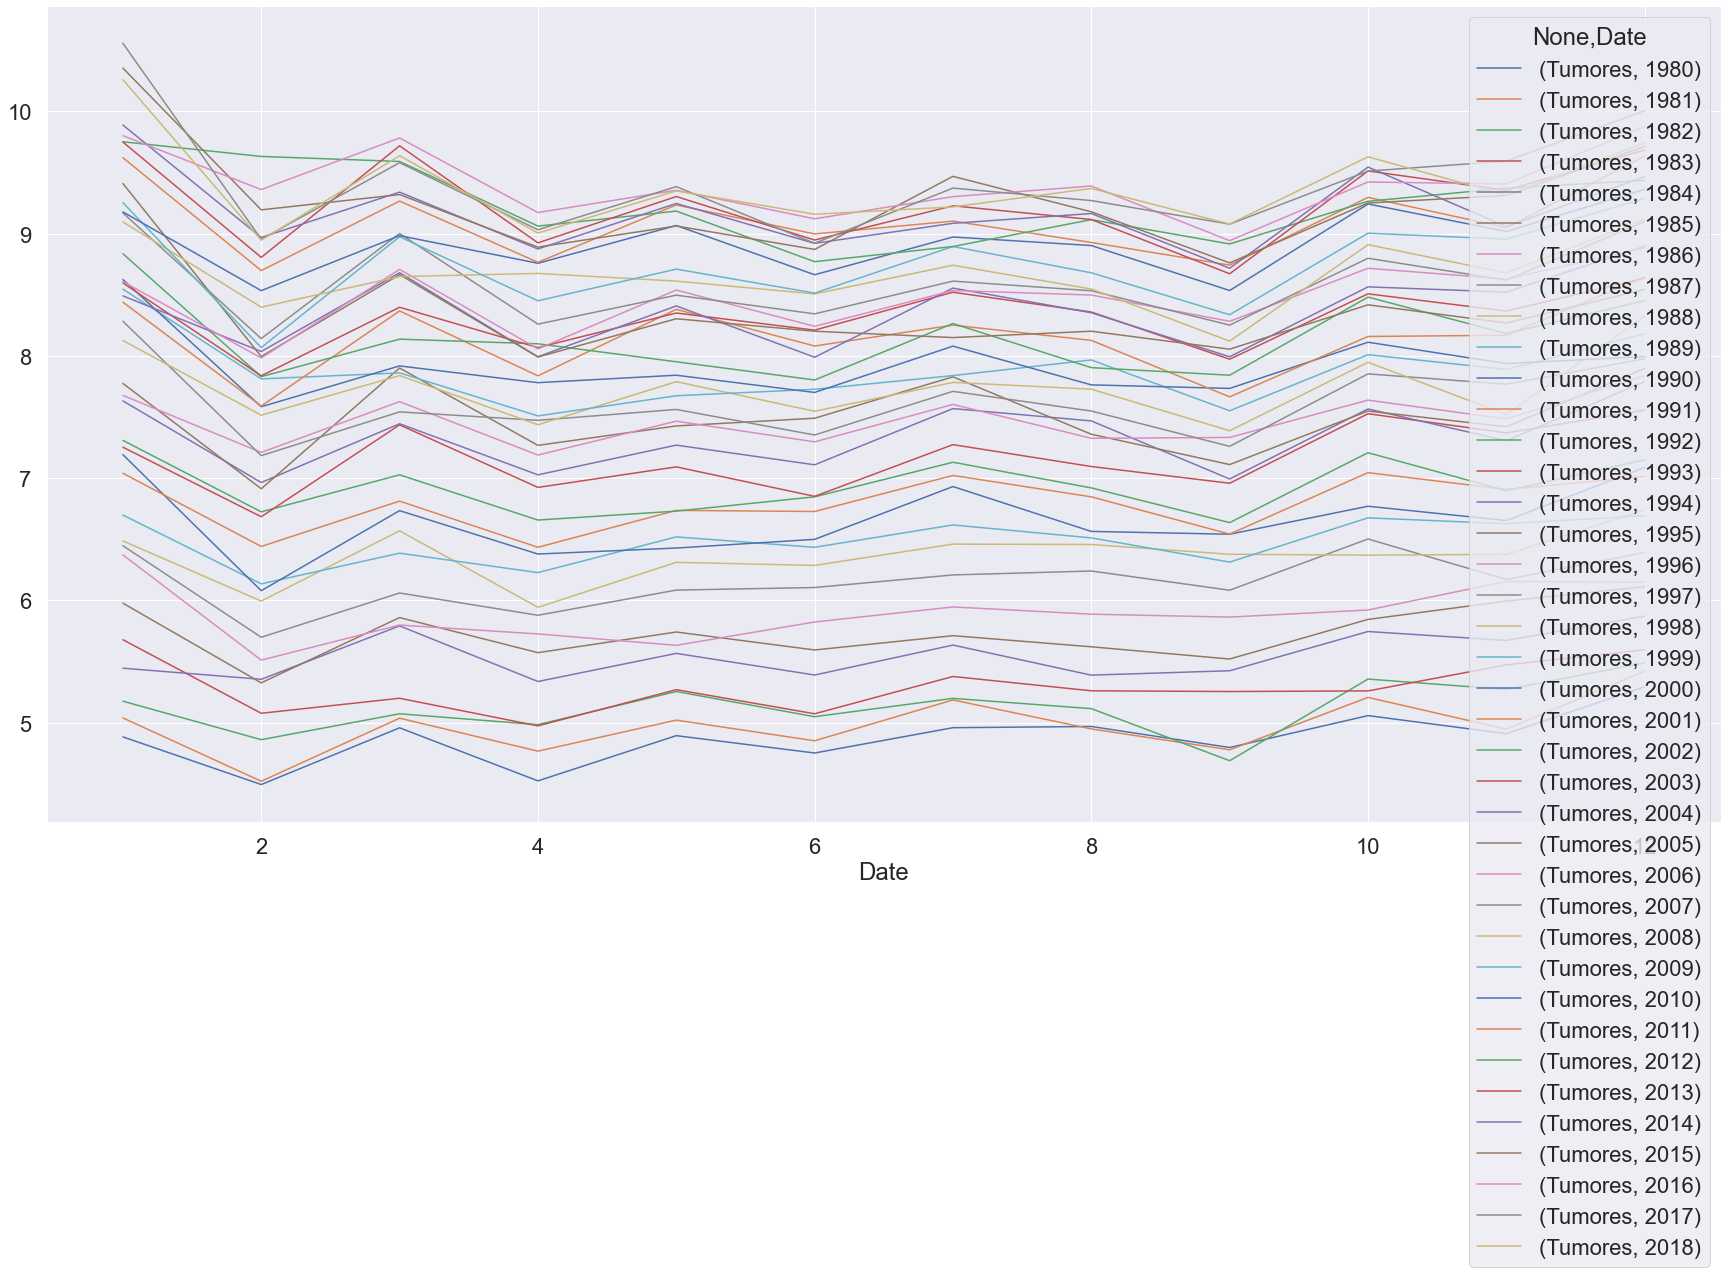

In [258]:
seasonal_plot(defunciones_R)
plt.show()

Podemos observar una componente estacional en prácticamente todos los años. Las eliminaremos de forma manual.

### Hacia la estacionariedad

La hoja de ruta es:

1. Estabilización de la varianza. Transformación Logaritmica

2. Diferenciación regular: periodo 1

3. Diferenciación estacional

Una vez realizado esto esperamos que la serie sea estacionaria.

###### Estabilización de la varianza. Transformación logaritmica

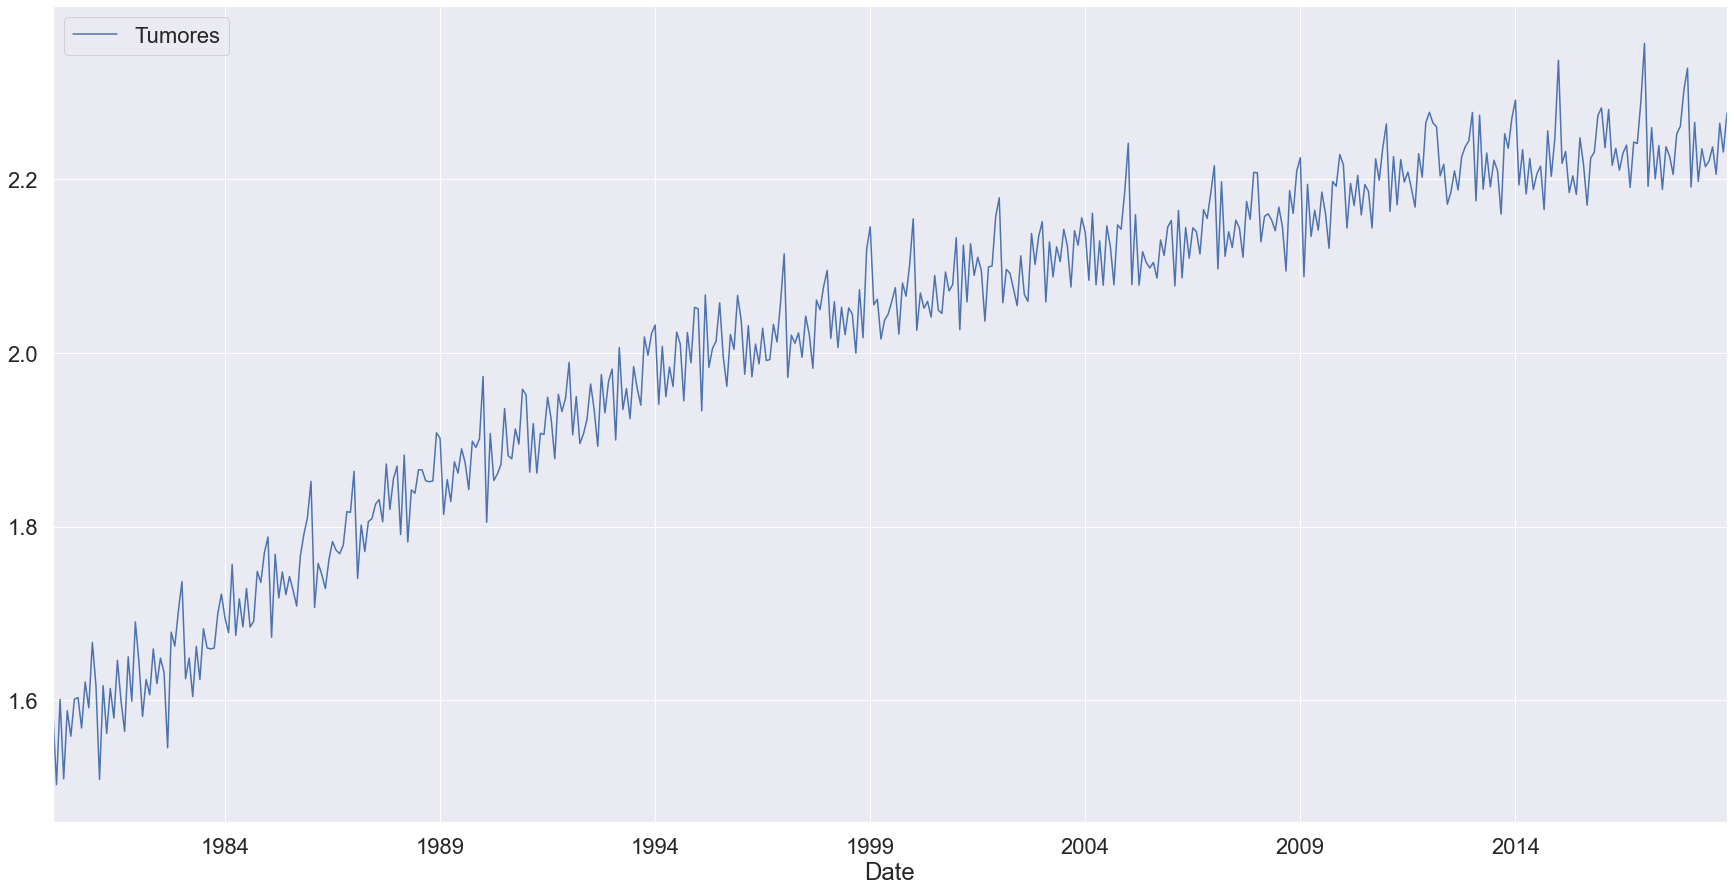

In [259]:
Defunciones_RLog = np.log(defunciones_R)
Defunciones_RLog.plot()
plt.show()

Se observa como la fluctuación a lo largo de todos los años prácticamente es la misma, se ha reducido de forma considerable al final. Prácticamente se podrían trazar dos líneas paralelas.

###### Diferenciación regular

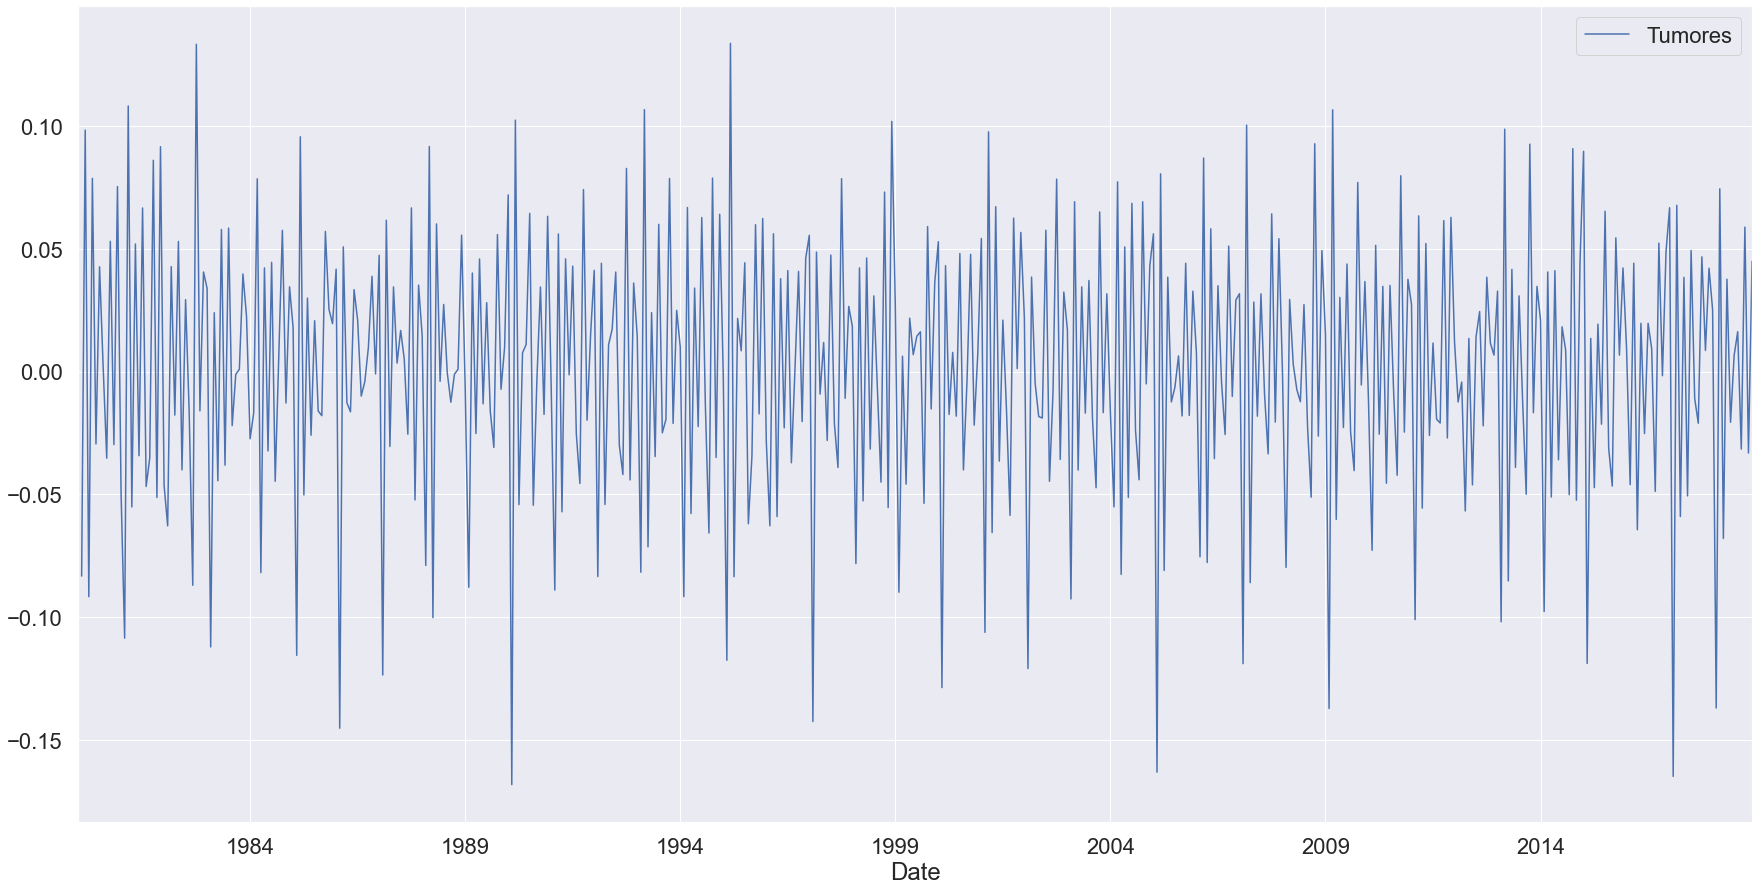

In [260]:
Defunciones_RLog_diff_1 = Defunciones_RLog.diff(periods=1)
Defunciones_RLog_diff_1.plot()
plt.show()

Con el código anterior conseguimos eliminar la tendencia creciente ya que a cada dato le restamos al anterior. Se centra relativamente en 0.

###### Diferenciación estacional

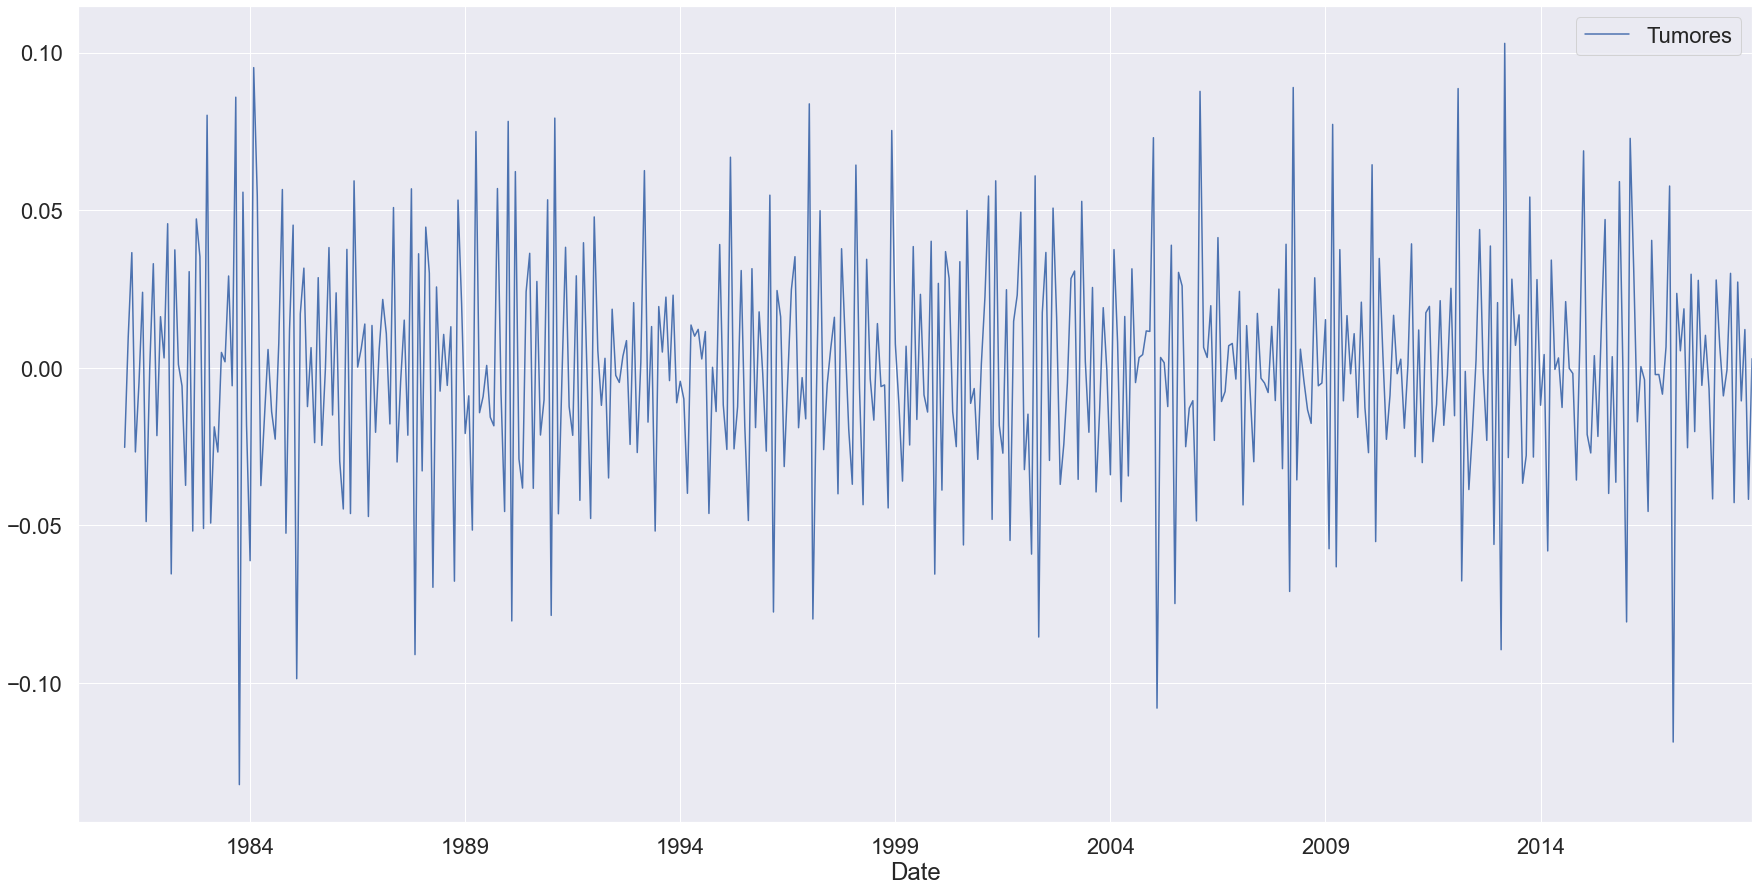

In [261]:
Defunciones_RLog_diff_1_12 = Defunciones_RLog_diff_1.diff(periods=12)
Defunciones_RLog_diff_1_12.plot()
plt.show()
#Diferenciamos con periodo 12, coge cada dato y le resta x(t) - 12

Sigue teniendo fluctuaciones pero no parecen tan significativas, volvemos a pasarle el test de DF.

In [262]:
test_stationarity(Defunciones_RLog_diff_1_12.dropna(inplace=False))

Results of Dickey-Fuller Test:
Test Statistic                -9.999930e+00
p-value                        2.307979e-15
#Lags Used                     1.800000e+01
Number of Observations Used    4.360000e+02
Critical Value (1%)           -3.979685e+00
Critical Value (5%)           -3.420608e+00
Critical Value (10%)          -3.133001e+00
dtype: float64


Se puede observar p-valor muy bajo (<0.05), serie por tanto estacionaria potencialmente modelizable mediante modelos ARIMA.

#### Autocorrelaciones

Son importantes porque:

Si decrece lentamente sería no estacionaria. Si tengo una serie que no es estacionaria tendré que diferenciar, eliminar esas componentes para hacia la estacionaridad. 
Con los correlogramas podemos identificar los órdenes ARIMA. El patrón de arima AR (autoregresivo) es de crecimiento en el ACF, corte en algún perido en el parcial. Es un patrón AR, autoregresivo. El patrón de MA (medias moviles), es justamente al reves, decrece muy rápido (geométrico) el PACF y se corta el ACF.

Con estos gráficos podemos proponer órdenes ARIMA. 

In [263]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


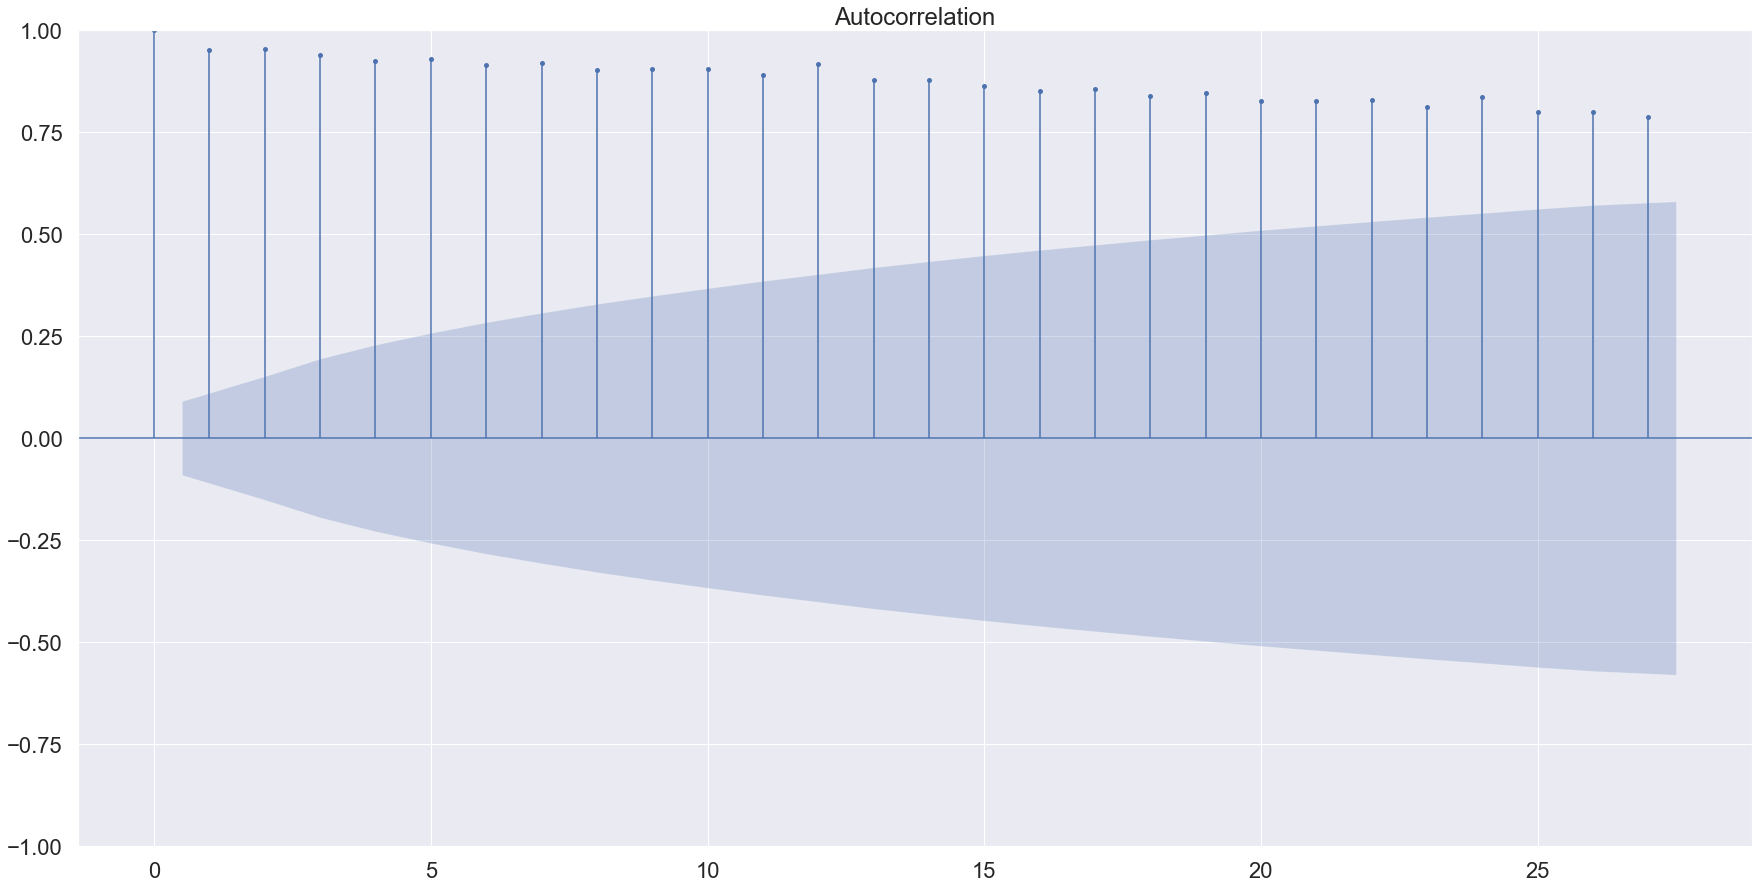

In [264]:
#SERIE NATURAL
plot_acf(defunciones_R.dropna(inplace=False))
plt.show()

Serie no estacionaria porque observamos decrecimiento lento aunque sube un poco en 12 por el componente estacional.

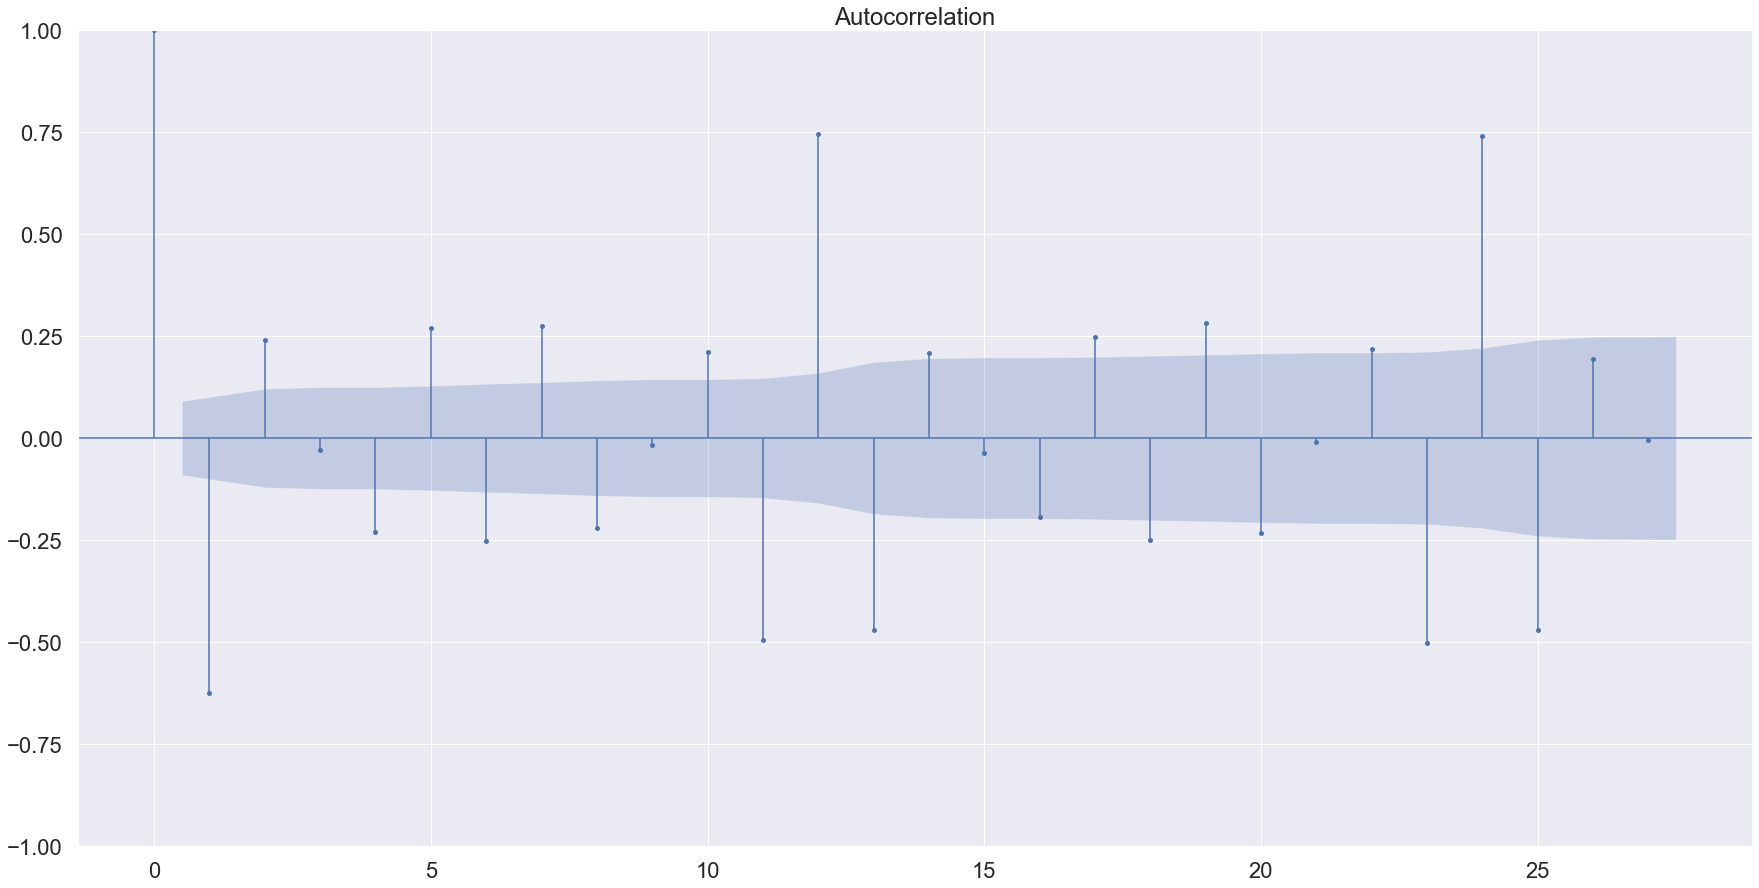

In [265]:
#Comprobamos la serie diferenciada pero de orden 1.

plot_acf(Defunciones_RLog_diff_1.dropna(inplace=False))
plt.show()

 Como aplané la serie, el decrecimiento es rápido.

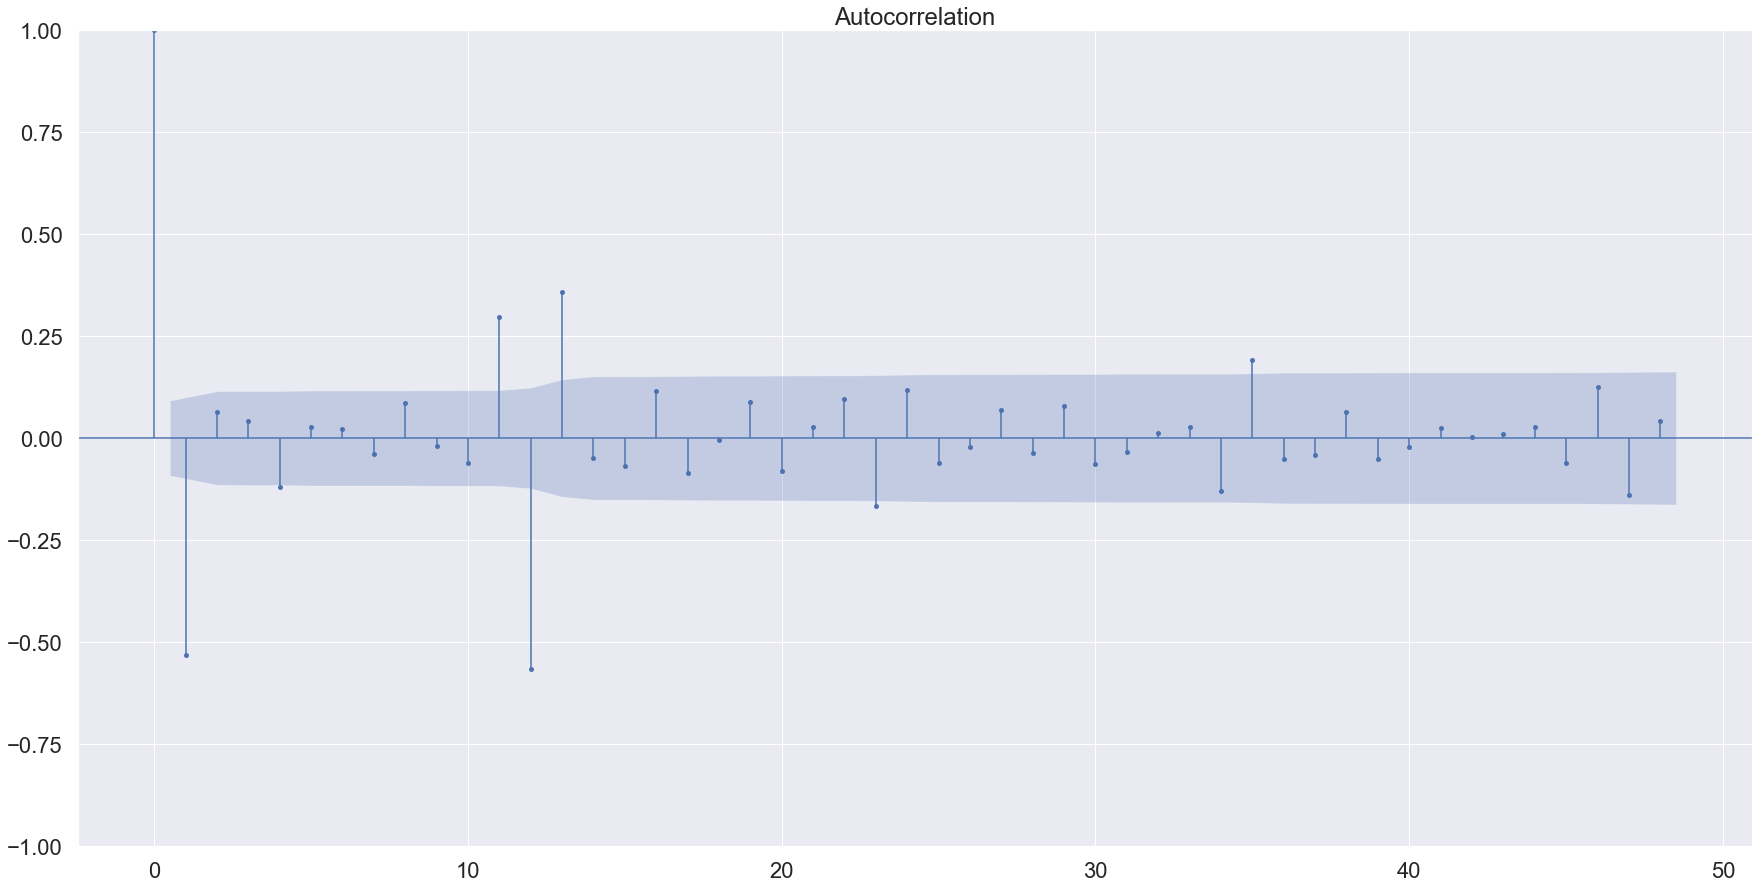

In [266]:
plot_acf(Defunciones_RLog_diff_1_12.dropna(inplace=False), lags=48)
plt.show()


Vamos a ver si hay una falta de correlación o no en el gráfico anterior. Si paso un filtro de series temporales cualquiera, los residuos que me quedan han de ser faltos de autocorrelación. Esperamos que los residuos estén dentro de las bandas de confianza. Observamos que hay residuos fuera por lo que le pasamos ese test.

In [267]:
#Test Ljung-box: le ponemos retardos por ej en 12 (como está la cosa en cuanto a Pvalores, va a mirar si son significativas hasta la 12)
sm.stats.acorr_ljungbox(Defunciones_RLog_diff_1_12.dropna(inplace=False), lags=12, return_df=True)

,lb_stat,lb_pvalue
1,129.277008,5.898437e-30
2,131.195826,3.244804e-29
3,131.960187,2.044681e-28
4,138.668658,5.440652e-29
5,138.992492,2.929607e-28
6,139.241231,1.449008e-27
7,139.929947,5.257683e-27
8,143.423489,4.601465e-27
9,143.595483,1.865387e-26
10,145.371793,3.332200e-26


Todos los pvalores son bajos, test de Ljung-box:

H0: la serie no tiene correlación

H1: la serie presenta correlación

En este caso lo que me dice es que todavía me qeudan cosas por modelizar. Existe un patrón de correlación todavía en estos retardos.

In [268]:
#Serie natural
sm.stats.acorr_ljungbox(defunciones_R, lags=12, return_df=True)

,lb_stat,lb_pvalue
1,426.225823,1.077322e-94
2,856.558157,1.001750e-186
3,1273.280096,9.235979e-276
4,1678.427887,0.000000e+00
5,2089.938925,0.000000e+00
6,2487.653902,0.000000e+00
7,2891.188612,0.000000e+00
8,3280.311834,0.000000e+00
9,3671.927203,0.000000e+00
10,4066.106965,0.000000e+00


P-valores también bajos, seguimos rechazando H0. Podemos concluir que mejoramos respecto a la serie natural pero todavía < 0.05 por lo que queda bastante por hacer.

#### Partición training-test

In [269]:
import statsmodels.tsa.holtwinters as ets
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

#Generamos serie logaritmica
Defunciones_RLog = defunciones_R.copy()
Defunciones_RLog['Tumores'] = np.log(Defunciones_RLog['Tumores'])
Defunciones_RLog

#Establecemos dos ventanas; training y test
Defunciones_R_tr = Defunciones_RLog[:'2016-12-01']
Defunciones_R_tst = Defunciones_RLog['2017-01-01':]
Defunciones_R_tst
#Esta seria la serie de test

,Tumores
Date,
2017-01-01,2.356884
2017-02-01,2.192100
2017-03-01,2.259782
2017-04-01,2.200774
2017-05-01,2.239113
2017-06-01,2.188520
2017-07-01,2.237833
2017-08-01,2.226891
2017-09-01,2.205854


### Mejor modelo de suavizado exponencial: Test residual Ljun - Box

El test de Ljung-Box es una prueba estadística utilizada para evaluar si hay autocorrelación significativa en los residuos de un modelo de series temporales. En el contexto del suavizado exponencial, este test se aplica a los residuos del modelo para verificar si exhiben patrones sistemáticos que podrían indicar que el modelo no está capturando adecuadamente la estructura de la serie temporal.

In [270]:
# Función para evaluar modelo. 
def eval_model(model,tr,tst,name='Model',lags=12): 
    lb = np.mean(sm.stats.acorr_ljungbox(model.resid, lags=lags, return_df=True).lb_pvalue) #sacamos df de los pvalores y hacemos media
    pred = model.forecast(steps=len(tst)) #se extraen con el forecast
    fig1, ax = plt.subplots() #generamos gráfico de 2: training y test
    ax.plot(tr, label='training')
    ax.plot(tst, label='test')
    ax.plot(pred, label='prediction') 
    plt.legend(loc='upper left') 
    tit = name + ":  LjungBox p-value --> " + str(lb) + "\n MAPE: " + str(round(mean_absolute_percentage_error(tst, pred)*100,2)) + "%" 
    plt.title(tit)
    plt.ylabel('Tumores')
    plt.xlabel('Date')
    plt.show()
    print(lb)

Test de LjunBox:

H0: ruido blanco

H1: correlación en los residuos

Veamos modelos de suavizado. Sabemos de antemano que el modelo de suavizado simple no es el que mejor se ajusta pues es para series sin tendencia o esta cambia lentamente.Así mismo el Doble de Holt tampoco se ajusta a nuestra serie pues la tendencia debe ser lineal. Aplicamos HW adictivo y multiplicativo; el primero de ellos es adecuado si se observa la presencia de fenómenos estadcionacionales que no varian a lo largo del tiempo y, el segundo, si varían. De primeras parece más interesante el segundo pero vamos a comprobarlo.

In [271]:
#Tets Ljung-box: le ponemos retardos en 12 (Pvalores para mirar si son significativas hasta la 12)
sm.stats.acorr_ljungbox(Defunciones_RLog_diff_1_12.dropna(inplace=False), lags=12, return_df=True)

,lb_stat,lb_pvalue
1,129.277008,5.898437e-30
2,131.195826,3.244804e-29
3,131.960187,2.044681e-28
4,138.668658,5.440652e-29
5,138.992492,2.929607e-28
6,139.241231,1.449008e-27
7,139.929947,5.257683e-27
8,143.423489,4.601465e-27
9,143.595483,1.865387e-26
10,145.371793,3.332200e-26


Observamos que los pvalores todavía son inferiores a alfa por lo que rechazamos H0 y concluimos que los valores presentan correlación. 

###### Método HW adictivo

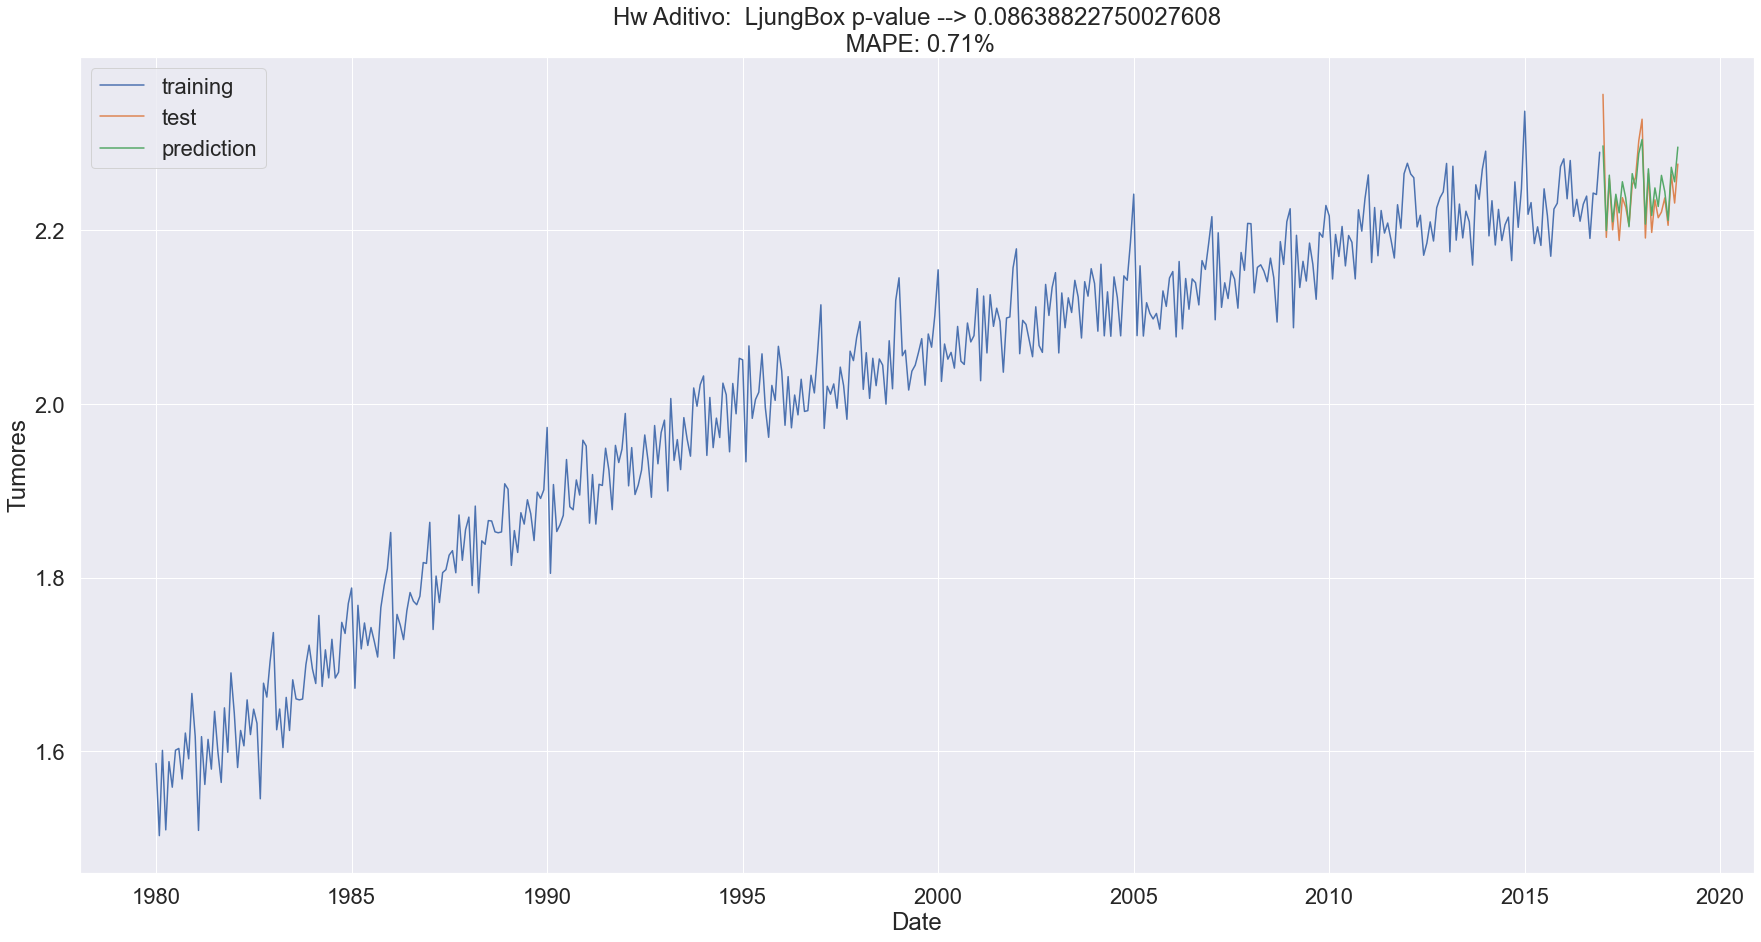

0.08638822750027608


In [272]:
hw_add = ets.ExponentialSmoothing(Defunciones_R_tr,trend='add', damped_trend=False, seasonal='add').fit()
hw_add.summary()

eval_model(hw_add,Defunciones_R_tr,Defunciones_R_tst,'Hw Aditivo')

###### Método HW multiplicativo

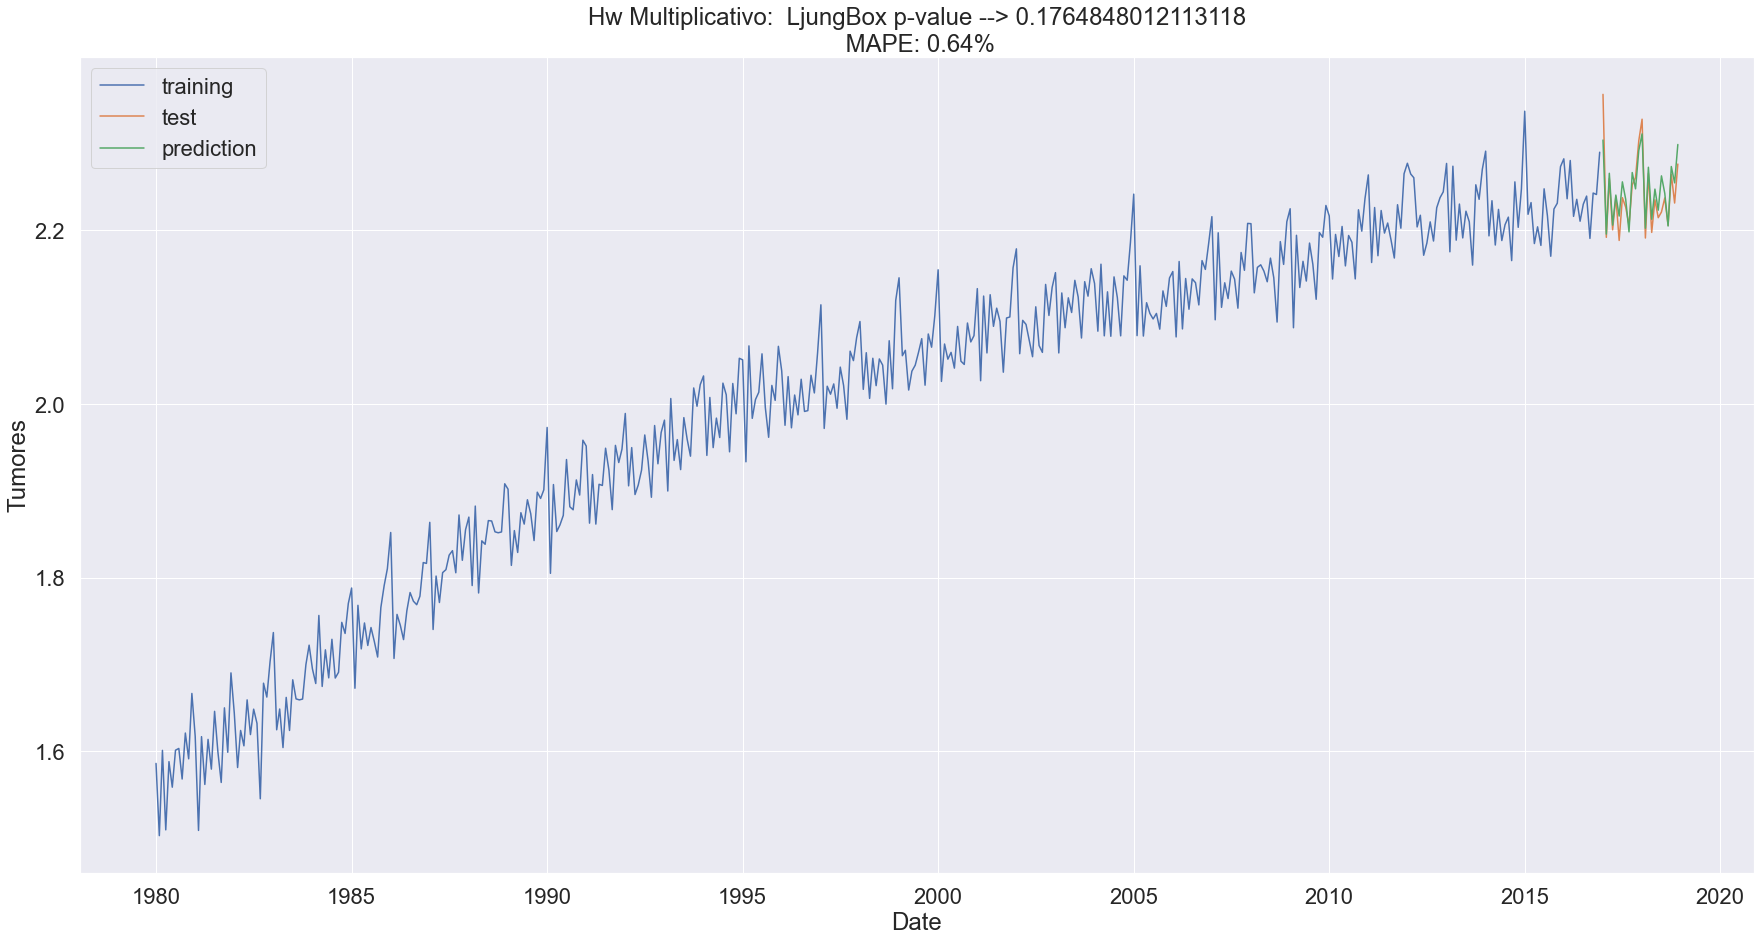

0.1764848012113118


In [273]:
hw_mul = ets.ExponentialSmoothing(Defunciones_R_tr,trend='mul', damped_trend=False, seasonal='mul').fit()
hw_mul.summary()

eval_model(hw_mul,Defunciones_R_tr,Defunciones_R_tst,'Hw Multiplicativo')

Podemos observar que con ambos métodos de suavizado podríamos aceptar la H0 de la hipóteis de LjungBox ya que el p-valor obtenido en ambos modelos es superior a alfa.Por tanto, concluimos que los residuos no están correlacionados. Debemos elegir entre un modelo u otro y nos fijamos en el MAPE. Podemos comprobar que el error es muy similar pero nos quedaremos con este segundo modelo porque el error es un poco más pequeño y presenta un pvalor mayor.

### Mejor Modelo ARIMA: Test de Ljung-Box

#### Arima Manual

In [275]:
import scipy.stats as stats
import seaborn as sns

# Función para evaluar residuos a través de contrastes de hipótesis
def residcheck(residuals, lags):
    """
    Function to check if the residuals are white noise. Ideally the residuals should be uncorrelated, zero mean, 
    constant variance and normally distributed. First two are must, while last two are good to have. 
    If the first two are not met, we have not fully captured the information from the data for prediction. 
    Consider different model and/or add exogenous variable. 
        
    If Ljung Box test shows p> 0.05, the residuals as a group are white noise. Some lags might still be significant. 
        
    Lags should be min(2*seasonal_period, T/5)
        
    plots from: https://tomaugspurger.github.io/modern-7-timeseries.html
        
    """
    resid_mean = np.mean(residuals)
    lj_p_val = np.mean(sm.stats.acorr_ljungbox(x=residuals, lags=lags).lb_pvalue)
    norm_p_val =  stats.jarque_bera(residuals)[1]
    adfuller_p = adfuller(residuals)[1]
        
      
    fig = plt.figure(figsize=(10,8))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2);
    acf_ax = plt.subplot2grid(layout, (1, 0));
    kde_ax = plt.subplot2grid(layout, (1, 1));
    
    residuals.plot(ax=ts_ax)
    plot_acf(residuals, lags=lags, ax=acf_ax);
    sns.kdeplot(residuals);
    #[ax.set_xlim(1.5) for ax in [acf_ax, kde_ax]]
    sns.despine()
    plt.tight_layout();
    plt.show()
    print("** Mean of the residuals: ", np.around(resid_mean,2))
        
    print("\n** Ljung Box Test, p-value:", np.around(lj_p_val,3), 
        "(>0.05, Uncorrelated)" if (lj_p_val > 0.05) else "(<0.05, Correlated)")
        
    print("\n** Jarque Bera Normality Test, p_value:", np.around(norm_p_val,3),
        "(>0.05, Normal)" if (norm_p_val>0.05) else "(<0.05, Not-normal)")
        
    print("\n** AD Fuller, p_value:", np.around(adfuller_p,3), 
        "(>0.05, Non-stationary)" if (adfuller_p > 0.05) else "(<0.05, Stationary)")
    
    return ts_ax, acf_ax, kde_ax 

En primer lugar debemos evaluar las autocorrelaciones para identificar patrones de efectos AR y MA tentativos. Una vez tengamos las órdenes a proponer, lo aplicamos a los modelos ARIMA.

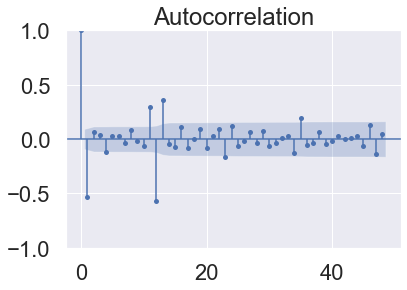

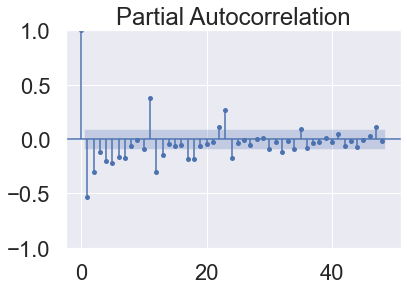

In [276]:
plot_acf(Defunciones_RLog_diff_1_12.dropna(inplace=False),lags=48)
plt.show()
plot_pacf(Defunciones_RLog_diff_1_12.dropna(inplace=False),lags=48,method='ywm')
plt.show()

En el ACF observamos un decrecimiento rápido en lo regular y aquellos retardos que se sitúan alrededor del 12 están fuera de las bandas (Estacional).Por tanto, me interesa comprobar la correlación en lo regular y el componente estacional. En cuanto al PACF se observa que en lo regular, todos los retardos se salen fuera de las bandas (decrecimiento lento), y, además,observamos componente estacional en 12, 24... Aunque en general los residuos no se ajustan bien a las bandas. 

Probamos ARIMA(0,1,1)(0,1,1)

###### Modelo 1: Modelo SARIMAX (0, 1, 1)x(0, 1, 1, 12)

En este caso, p=0, d=1, q=1 para los componentes ARIMA y P=0, D=1, Q=1 con s=12 para los componentes estacionales.

In [277]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
arima1 = SARIMAX(Defunciones_R_tr, 
                order = (0, 1, 1), 
                seasonal_order =(0, 1, 1, 12)) 
  
arima_1 = arima1.fit()
arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Tumores   No. Observations:                  444
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                1062.744
Date:                            Fri, 10 Mar 2023   AIC                          -2119.488
Time:                                    13:01:06   BIC                          -2107.290
Sample:                                01-01-1980   HQIC                         -2114.672
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8387      0.029    -28.962      0.000      -0.895      -0.782
ma.S.L12      -0.8620      0.038    -22.703      0.000      -0.936      -0.788
sigma2         0.0004   2.23e-05     18.144      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                46.71
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.44
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- `ma.L1`: El coeficiente para el componente de media móvil de orden 1 es -0.8387. Este coeficiente es significativo ya que el valor P>|z| es muy pequeño (0.000), lo que indica que es estadísticamente significativo.

- `ma.S.L12`: El coeficiente para el componente estacional de media móvil de orden 1 (lag 12) es -0.8620. También es significativo.

`AIC` (Criterio de Información de Akaike) es -2119.488, y `BIC` (Criterio de Información Bayesiano) es -2107.290. 

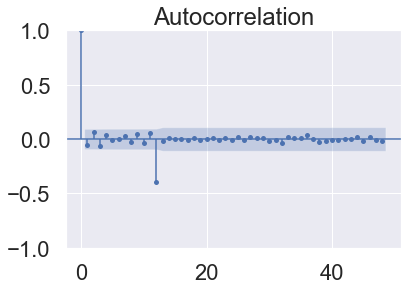

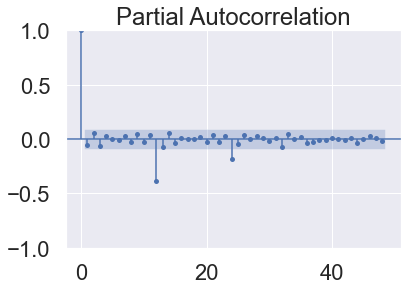

In [278]:
plot_acf(arima_1.resid,lags=48)
plt.show()
plot_pacf(arima_1.resid,lags=48,method='ywm')
plt.show()


Con este modelo se adaptan prácticamente todas las correlaciones excepto la 12. Vamos a comprobar el `pvalor` y el `MAPE`.

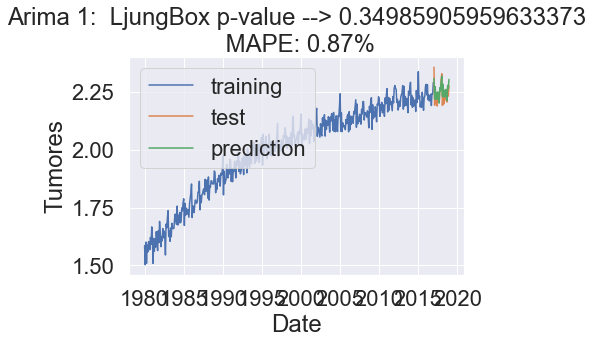

0.34985905959633373


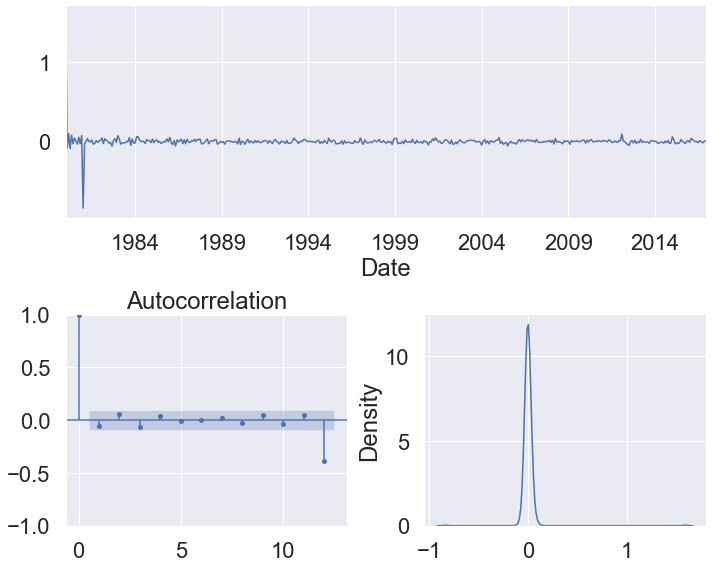

** Mean of the residuals:  -0.0

** Ljung Box Test, p-value: 0.35 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot:xlabel='Date'>,
 <AxesSubplot:title={'center':'Autocorrelation'}>,
 <AxesSubplot:ylabel='Density'>)

In [279]:
eval_model(arima_1,Defunciones_R_tr,Defunciones_R_tst,'Arima 1')
residcheck(arima_1.resid,12)

Antes teníamos un `p-valor` de 0.18 en el multiplicativo y de 0.09 en el adictivo. El `p-valor` en este modelo es más elevado 0.35. Este ARIMA es mejor en cuanto a residuos.

###### Modelo 2: Modelo SARIMAX (1, 1, 0)x(1, 1, 0, 12)

El modelo SARIMAX se especifica con p=1, d=1, q=0 para los componentes ARIMA y P=1, D=1, Q=0 con s=12 para los componentes estacionales.. De antemano sabemos que este modelo va a ser peor que el anterior pero vamos a comprobarlo.

In [280]:
arima2 = SARIMAX(Defunciones_R_tr, 
                order = (1, 1, 0), 
                seasonal_order =(1, 1, 0, 12))
  
arima_2 = arima2.fit()
arima_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Tumores   No. Observations:                  444
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 957.620
Date:                            Fri, 10 Mar 2023   AIC                          -1909.241
Time:                                    13:01:08   BIC                          -1897.042
Sample:                                01-01-1980   HQIC                         -1904.424
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4892      0.036    -13.704      0.000      -0.559      -0.419
ar.S.L12      -0.5306      0.040    -13.245      0.000      -0.609      -0.452
sigma2         0.0007   4.16e-05     16.369      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   8.18   Jarque-Bera (JB):                 5.04
Prob(Q):                              0.00   Prob(JB):                         0.08
Heteroskedasticity (H):               0.69   Skew:                             0.06
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

`ar.L1`: El coeficiente para el componente autorregresivo de orden 1 es -0.4892. Este coeficiente es significativo (valor P>|z| = 0.000), lo que indica que el componente AR es relevante para el modelo.

`ar.S.L12`: El coeficiente para el componente estacional autorregresivo de orden 1 (lag 12) es -0.5306, también significativo.

`AIC` es -1909.241 y `BIC` es -1897.042. Ambos valores son negativos, y modelos con valores más bajos indican un mejor ajuste relativo.

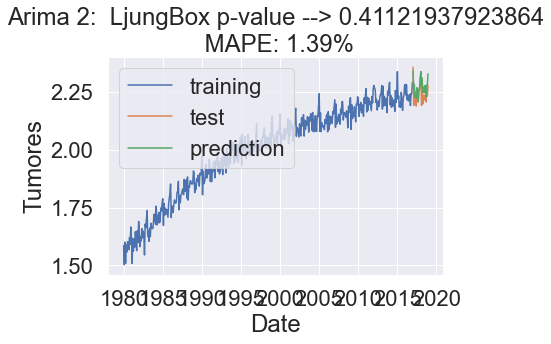

0.41121937923864


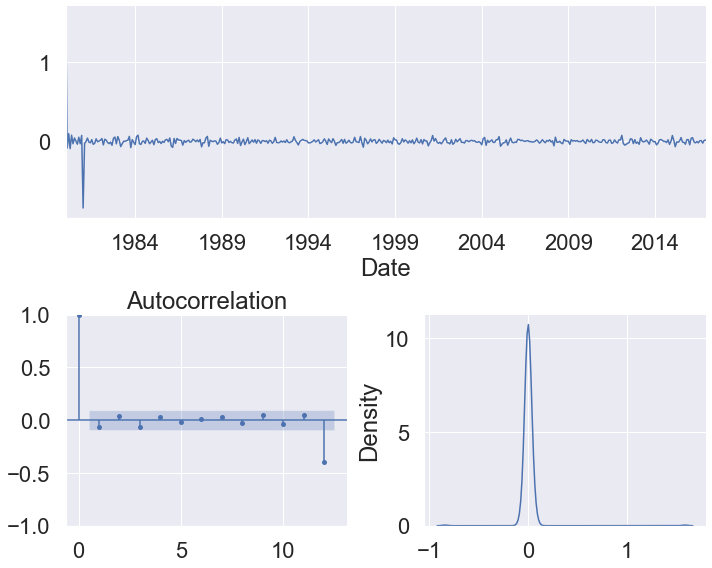

** Mean of the residuals:  0.0

** Ljung Box Test, p-value: 0.411 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot:xlabel='Date'>,
 <AxesSubplot:title={'center':'Autocorrelation'}>,
 <AxesSubplot:ylabel='Density'>)

In [281]:
eval_model(arima_2,Defunciones_R_tr,Defunciones_R_tst,'Arima 2')

residcheck(arima_2.resid,12)


En cuanto a residuos volvemos a observar que se adaptan todos excepto el 12 por componente estacional y en cuanto a error lo vemos peor que el anterior porque es más elevado. Me quedo con el anterior, ambas partes MA.

##### Modelo 3: Modelo SARIMAX (1, 1, 1)x(1, 1, 1, 12)

El modelo SARIMAX se especifica con p=1, d=1, q=1 para los componentes ARIMA y P=1, D=1, Q=1 con s=12 para los componentes estacionales.

In [282]:
arima3 = SARIMAX(Defunciones_R_tr, 
                order = (1, 1, 1), 
                seasonal_order =(1, 1, 1, 12))
  
arima_3 = arima3.fit()
arima_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Tumores   No. Observations:                  444
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                1063.679
Date:                            Fri, 10 Mar 2023   AIC                          -2117.358
Time:                                    13:01:10   BIC                          -2097.027
Sample:                                01-01-1980   HQIC                         -2109.331
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0240      0.054      0.445      0.656      -0.082       0.130
ma.L1         -0.8444      0.033    -25.363      0.000      -0.910      -0.779
ar.S.L12      -0.0736      0.056     -1.304      0.192      -0.184       0.037
ma.S.L12      -0.8419      0.044    -19.202      0.000      -0.928      -0.756
sigma2         0.0004   2.23e-05     18.118      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                48.88
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.45
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

`ar.L1`: El coeficiente para el componente autorregresivo de orden 1 es 0.0240. Sin embargo, este coeficiente no es significativo (p-value de 0.656), lo que indica que el componente AR no contribuye significativamente al modelo.

`ma.L1`: El coeficiente para el componente de media móvil de orden 1 es -0.8444, y es significativo, lo que indica que el componente MA es relevante.

`ar.S.L12` y `ma.S.L12`: Estos coeficientes son para los términos estacionales y muestran que hay cierta influencia significativa de los términos estacionales tanto en el componente AR como en el componente MA.

`AIC` es -2117.358 y `BIC` es -2097.027. Ambos valores son negativos, y modelos con valores más bajos indican un mejor ajuste relativo.

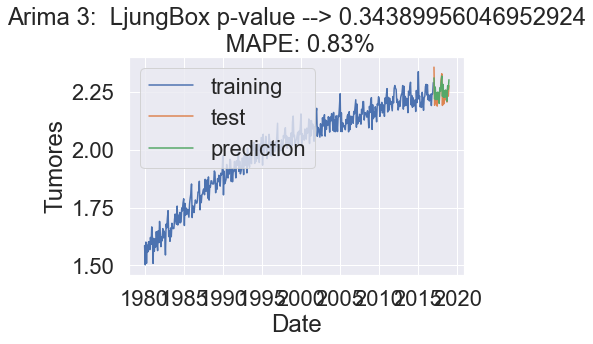

0.34389956046952924


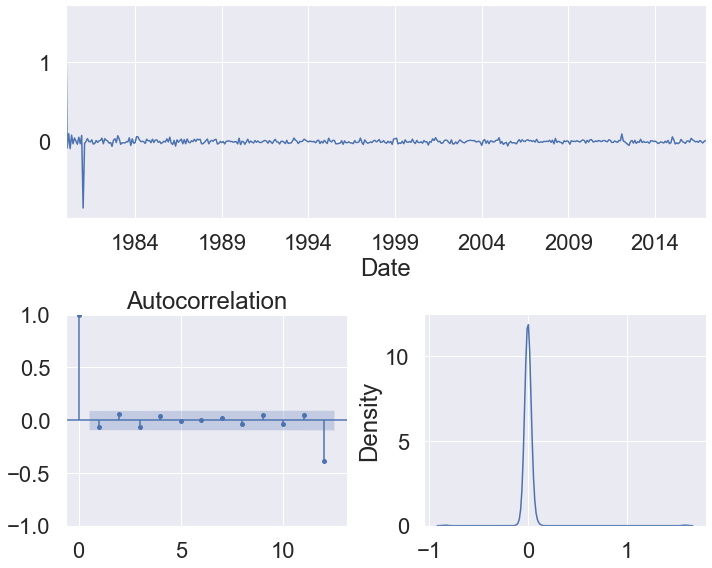

** Mean of the residuals:  -0.0

** Ljung Box Test, p-value: 0.344 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot:xlabel='Date'>,
 <AxesSubplot:title={'center':'Autocorrelation'}>,
 <AxesSubplot:ylabel='Density'>)

In [283]:
eval_model(arima_3,Defunciones_R_tr,Defunciones_R_tst,'Arima 3')
residcheck(arima_3.resid,12)


Nos quedaríamos con este modelo porque se adapta más o menos como los otros en cuanto a correlación (excepto retardo 12) y presenta un error más bajo pero tiene más parámetros que los anteriores. Además todos ellos no rechazan H0 por lo que los residuos parece que no presentan correlación. Por Principio de Parsimonia nos quedamos con el primer modelo, ambas partes MA.
Los 3 presentan un valor de Akaike muy bajo, lo cual es positivo (no están sobreparametrizados).Veamos que modelo elige el ARIMA automático teniendo en cuenta el criterio de Akaike.

#### Arima Automático

In [284]:
import pmdarima as pm

# Ajustamos modelo arima step-wise con métrica AIC para la serie
arima_auto = pm.auto_arima(Defunciones_R_tr, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q, hasta orden 5
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      #start_P=None, 
                      D=None, 
                      trace=True, 
                      error_action='ignore',   
                      suppress_warnings=True, 
                      stepwise=True)

print(arima_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-2131.425, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-1339.055, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-1876.126, Time=0.58 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-1809.771, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-1340.659, Time=0.05 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-1811.200, Time=0.85 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-1977.476, Time=0.83 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=-2113.586, Time=1.86 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=-2126.068, Time=2.22 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-1640.490, Time=0.36 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=-1883.085, Time=2.01 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=-2070.286, Time=1.49 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=-2144.913, Time=2.57 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=-2129.079, Time=1.83 sec
 ARIM

El modelo automático se detiene cuando encuentra aquel con menor AKAIKE (AIC), y es el modelo ARIMA(0,1,1)(1,0,1).

In [285]:
# Función para evaluar modelo auto_arima que usaremos posteriormente
def eval_model_Aarima(model,tr,tst,name='Model',lags=12):
      lb = np.mean(sm.stats.acorr_ljungbox(model.resid(), lags=lags, return_df=True).lb_pvalue)
      pred = model.predict(n_periods=len(tst))
      fig1, ax = plt.subplots()
      ax.plot(tr, label='training')
      ax.plot(tst, label='test')
      ax.plot(pred, label='prediction')
      plt.legend(loc='upper left')
      tit = name + ":  LjungBox p-value --> " + str(lb) + "\n MAPE: " + str(round(mean_absolute_percentage_error(tst, pred)*100,2)) + "%"
      plt.title(tit)
      plt.ylabel('Serie')
      plt.xlabel('Date')
      plt.show()
      model.plot_diagnostics(figsize=(14,10))
      plt.show()  

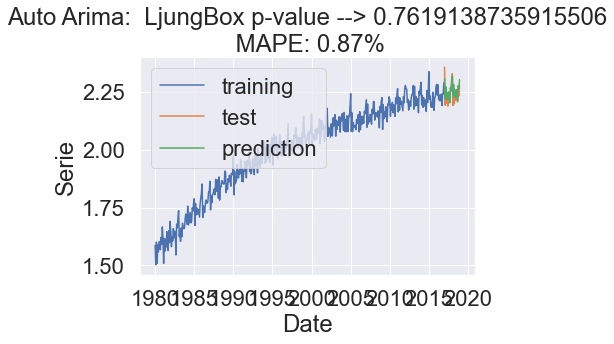

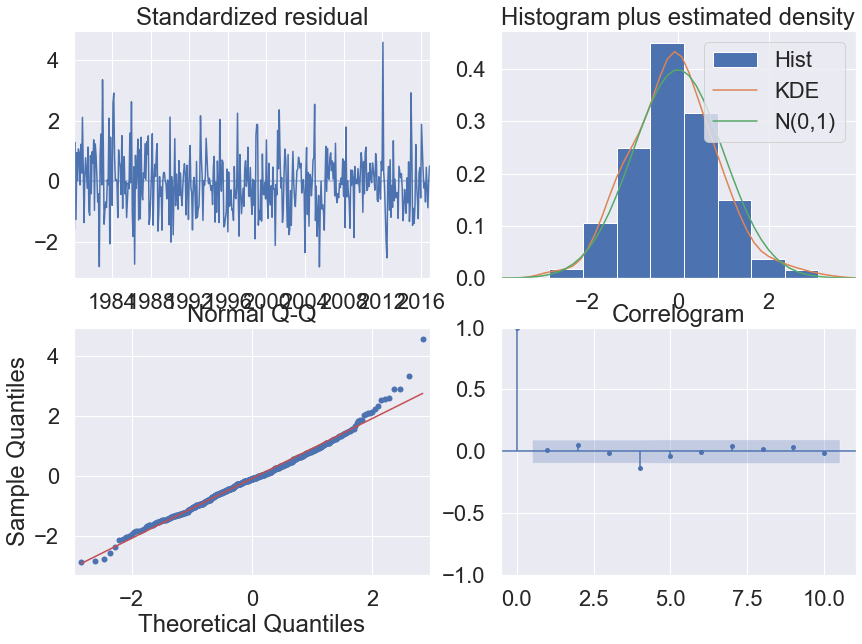

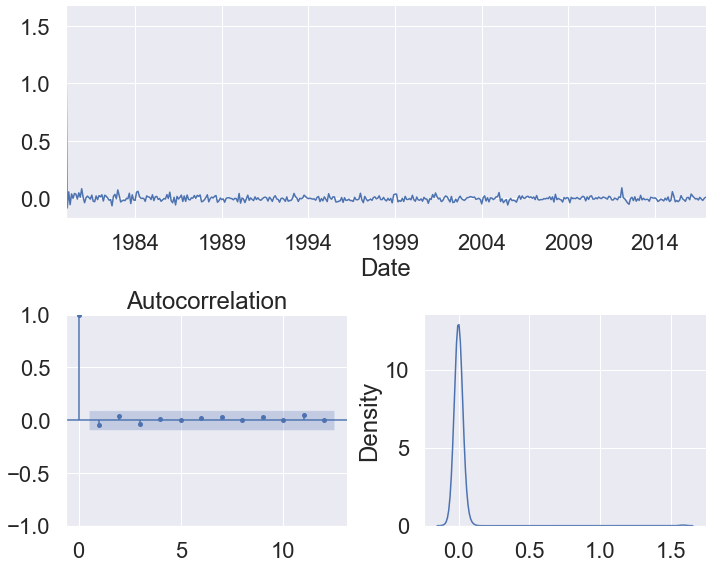

** Mean of the residuals:  0.0

** Ljung Box Test, p-value: 0.762 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot:xlabel='Date'>,
 <AxesSubplot:title={'center':'Autocorrelation'}>,
 <AxesSubplot:ylabel='Density'>)

In [286]:
eval_model_Aarima(arima_auto,Defunciones_R_tr,Defunciones_R_tst,'Auto Arima')
residcheck(arima_auto.resid(),12)

Me quedaría con el modelo que tenga residuos incorrelados y error menor. En este caso el modelo automático es el mejor porque los residuos se encuentran todos incorrelacionados (no presenta estacionalidad en el residuo 12) y tiene el mismo error que el modelo manual elegido. Podemos observar que pasa el test de Ljung Box porque el `p-valor` 0,762 es mayor que 0,05, por tanto podemos afirmar que son "ruido blanco".

Si nos fijamos solamente en el `MAPE` podemos afirmar que el ARIMA 3 es el que se ajusta mejor a las predicciones por tener un error más bajo que el resto de modelos (`MAPE`=0.83%). Si nos fijamos en el pvalor el mejor modelo sería el automático. En caunto a principio de Parsimonia nos quedaríamos con el primero.